In [187]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [188]:
# Load CSV into a DataFrame
df = pd.read_csv("music_dataset_mod.csv")

# Make a copy for analysis
data = df.copy()

# Show basic shape and first few rows
print("Shape:", data.shape)
data.head()


Shape: (1000, 13)


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [189]:
# Overview of data types, non-null counts, and memory usage
data.info()

# Quick summary statistics (numerical columns only)
data.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

,count,mean,std,min,25%,50%,75%,max
Tempo,1000.0,121.177891,19.600614,50.494818,107.885045,121.356455,135.054584,175.982637
Dynamics Range,1000.0,46.684324,17.809545,-4.165724,34.252531,46.390854,58.481545,104.932942
Vocal Presence,1000.0,51.741685,29.008872,0.408370,26.635663,52.245242,76.919814,109.643123
Percussion Strength,1000.0,54.854619,29.489650,0.598517,29.782438,54.926936,79.438614,114.949678
String Instrument Detection,1000.0,58.442054,29.650752,0.217449,32.240968,59.366659,82.872727,119.991892
Electronic Element Presence,1000.0,48.813244,33.239190,-29.990605,22.331010,49.871999,75.133776,119.728293
Rhythm Complexity,1000.0,54.421479,29.606431,0.146433,29.603967,54.618441,78.502328,119.699889
Drums Influence,1000.0,76.646294,18.867990,18.995222,62.916792,75.739758,89.973436,140.031079
Distorted Guitar,1000.0,47.462577,32.492813,0.047202,11.678634,52.994852,75.149865,99.586429
Metal Frequencies,1000.0,47.319735,32.274932,0.000000,14.422842,50.722858,75.673932,100.000000


In [190]:
# Count missing values per column
missing_counts = data.isnull().sum()
missing_counts[missing_counts > 0]


Genre    110
dtype: int64

In [191]:
# Unique genres
unique_genres = data["Genre"].unique()
print("Unique genres:", unique_genres)
print("Number of unique genres:", len(unique_genres))

# Class distribution
genre_counts = data["Genre"].value_counts()
genre_counts


Unique genres: ['Country' 'Classical' 'Rock' 'Hip-hop' nan 'Jazz']
Number of unique genres: 6


Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64

In [192]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of dataset and drop rows where Genre is missing
corr_df = data.copy()
corr_df = corr_df.dropna(subset=["Genre"])

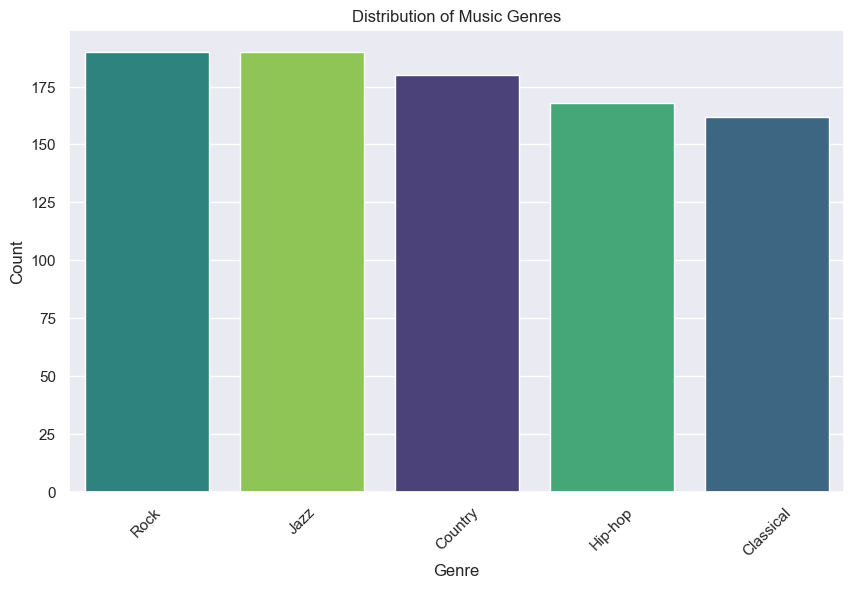

In [193]:
# Visualize the Genre distribution
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Genre", order=genre_counts.index, hue="Genre", palette="viridis", legend=False)
plt.title("Distribution of Music Genres")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Genre")
plt.show()


# Correlation Analysis

In [194]:
# Features (X) and Target (y)
X = corr_df.drop(columns=["Genre"])
y = corr_df["Genre"]

# Encode Genre into numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Replace original Genre with encoded Genre
corr_df = X.copy()
corr_df["Genre_encoded"] = y_encoded

print("Shape after cleaning:", corr_df.shape)
corr_df.head()

Shape after cleaning: (890, 13)


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1


In [195]:
# Compute correlation matrix
corr_matrix = corr_df.corr()

# Show top correlations with Genre_encoded
print("Top correlations with Genre:")
print(corr_matrix["Genre_encoded"].sort_values(ascending=False).head(10))


Top correlations with Genre:
Genre_encoded                  1.000000
Distorted Guitar               0.607291
Metal Frequencies              0.582498
Electronic Element Presence    0.232907
Drums Influence                0.169501
Percussion Strength            0.146171
Tempo                          0.113906
Rhythm Complexity              0.095718
Ambient Sound Influence        0.014561
Vocal Presence                -0.005501
Name: Genre_encoded, dtype: float64


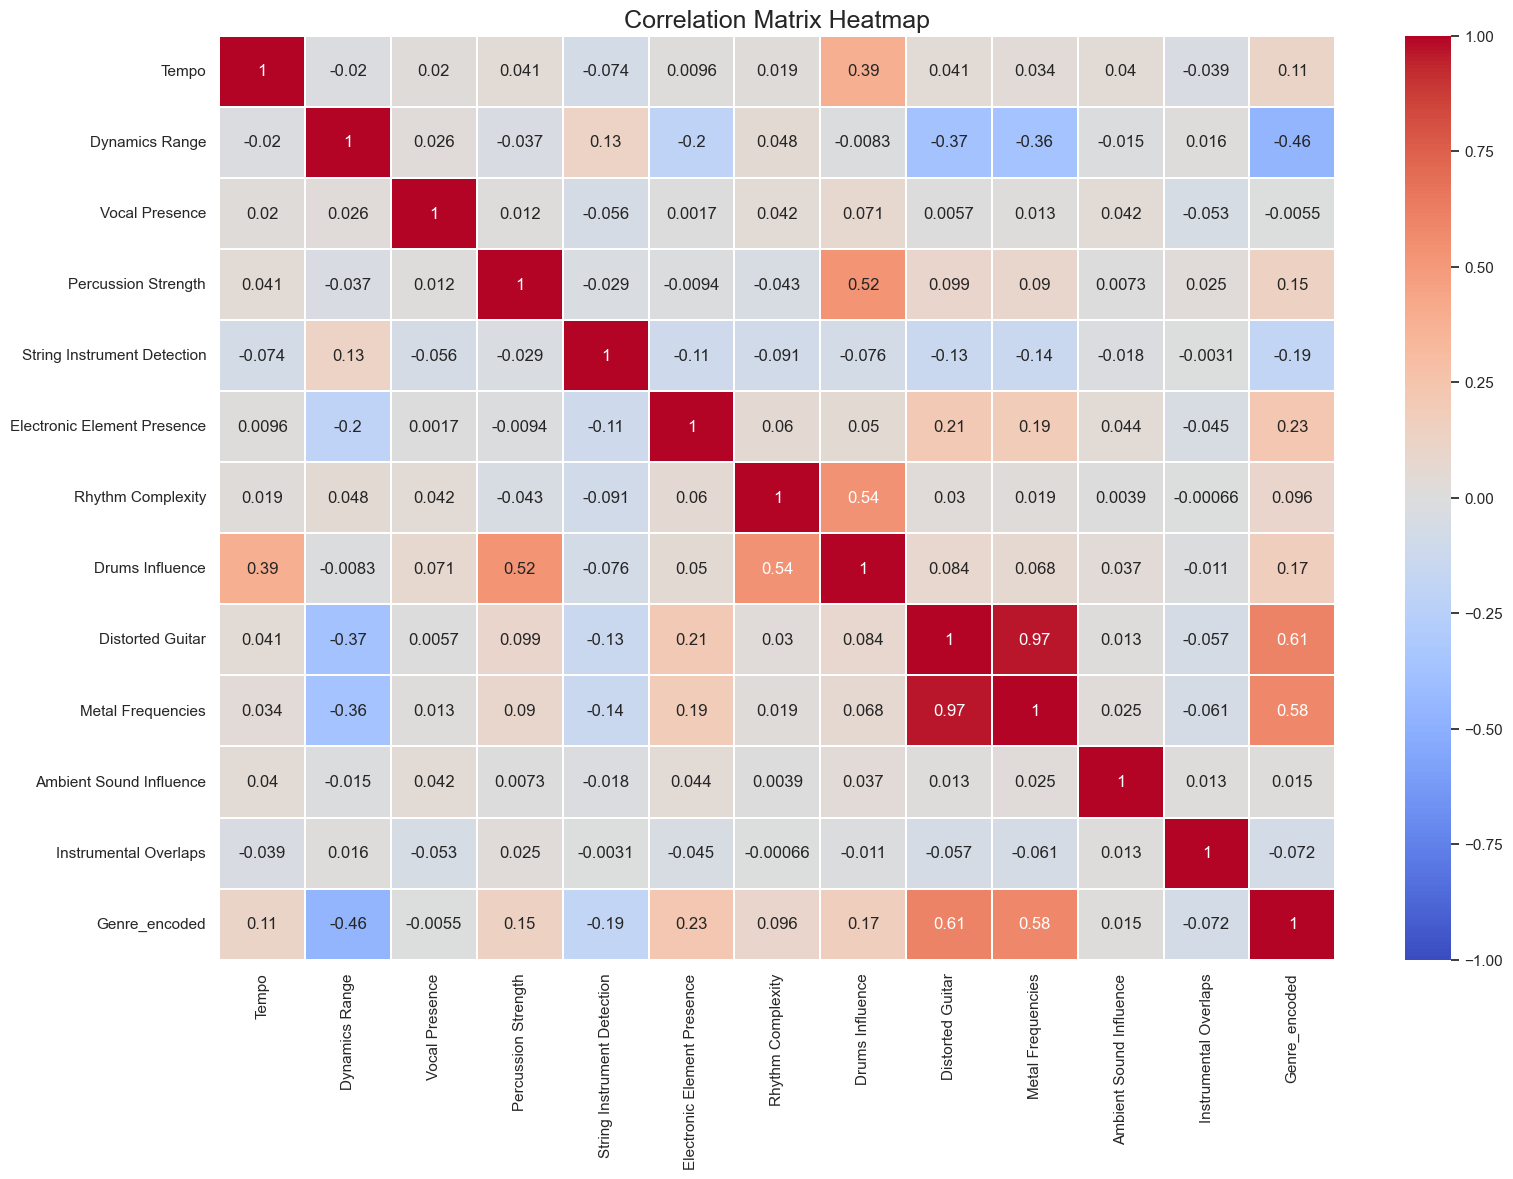

In [196]:
#Visualize heatmap
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap="coolwarm",vmin=-1,vmax=1,annot=True,linewidths=0.1 )
plt.title("Correlation Matrix Heatmap",fontsize=18)
plt.show()


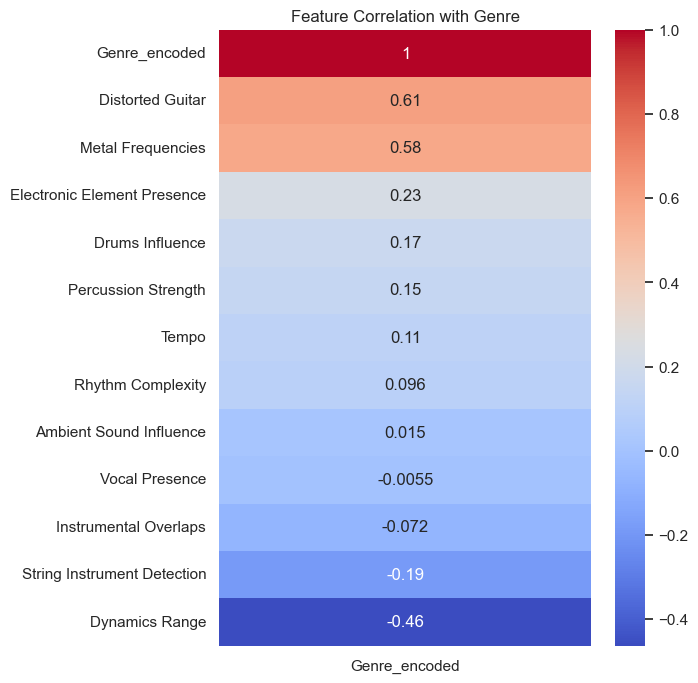

In [197]:
#Focus only on Genre correlations
plt.figure(figsize=(6,8))
sns.heatmap(corr_matrix[["Genre_encoded"]].sort_values(by="Genre_encoded", ascending=False),
            cmap="coolwarm", annot=True, cbar=True)
plt.title("Feature Correlation with Genre")
plt.show()


# Prepare the data

In [198]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Use only numeric features (drop Genre & encoded version)
X = corr_df.drop(columns=["Genre_encoded"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original shape:", X.shape)


Original shape: (890, 12)


In [199]:
# Initialize PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio per component:\n", explained_variance)


Explained variance ratio per component:
 [0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


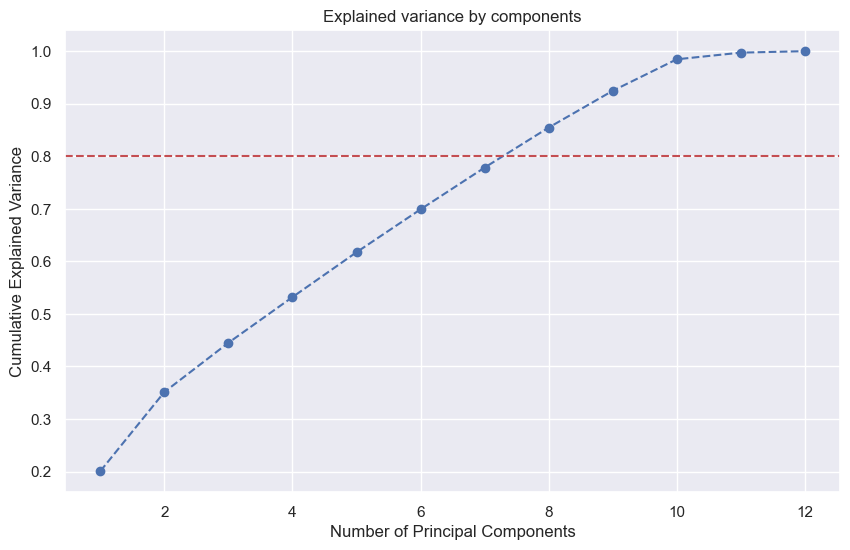

Number of components to retain (>=80% variance): 8


In [200]:
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker="o", linestyle="--")
plt.axhline(y=0.80, color="r", linestyle="--", label="80% Threshold")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained variance by components")
plt.show()

# Find number of components for >= 80% variance
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Number of components to retain (>=80% variance): {n_components_80}")


In [201]:
# Reapply PCA with optimal number of components
pca_opt = PCA(n_components=n_components_80)
X_reduced = pca_opt.fit_transform(X_scaled)

print("Reduced shape:", X_reduced.shape)


Reduced shape: (890, 8)


In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [203]:
# Use optimal PCA-transformed features
X_pca_reduced = X_reduced   # From previous PCA step
y_final = y_encoded

# Train/test split (30% test size)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca_reduced, y_final, test_size=0.3, random_state=42
)


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# --- PCA-transformed data ---
logreg_pca = LogisticRegression(max_iter=10000)
logreg_pca.fit(X_train_pca, y_train)
y_pred_pca = logreg_pca.predict(X_test_pca)

print("PCA data")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca, target_names=le.classes_))


PCA data
Accuracy: 0.5355805243445693
              precision    recall  f1-score   support

   Classical       0.89      0.98      0.93        51
     Country       0.32      0.23      0.27        52
     Hip-hop       0.49      0.44      0.46        48
        Jazz       0.41      0.42      0.42        62
        Rock       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [205]:
# Split the original (non-PCA) data into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_final, test_size=0.3, random_state=42)

In [206]:
# --- Original scaled data ---
logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)


LogisticRegression(max_iter=10000)

In [207]:
# Predict and evaluate the model with original features
y_pred_orig = logreg_orig.predict(X_test_orig)

print("\nOriginal data")
print("Accuracy:", accuracy_score(y_test_orig, y_pred_orig))
print(classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))


Original data
Accuracy: 0.5318352059925093
              precision    recall  f1-score   support

   Classical       0.86      1.00      0.93        51
     Country       0.33      0.25      0.29        52
     Hip-hop       0.45      0.46      0.45        48
        Jazz       0.44      0.39      0.41        62
        Rock       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



# Genre Prediction and Integration

In [233]:
# Work on a fresh copy of the dataset
df_complete = data.copy()

# Rows where Genre is missing
unknown_df = df_complete[df_complete["Genre"].isnull()]
unknown_df


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [234]:
# Use the same numeric features as before (excluding Genre column)
X_unknown = unknown_df.drop(columns=["Genre"])

# Scale using the SAME scaler fitted earlier
X_unknown_scaled = scaler.transform(X_unknown)
X_unknown_pca = pca_opt.transform(X_unknown_scaled)

# predict the genres
y_unknown_pred = logreg_pca.predict(X_unknown_pca)

In [239]:
# Convert numeric predictions back to genre labels
unknown_df.loc[:,'Predicted_Genre'] = le.inverse_transform(y_unknown_pred)

In [240]:
# Display the DataFrame with predicted genres
print(unknown_df[['Predicted_Genre']])

    Predicted_Genre
13        Classical
18          Country
22          Country
31             Rock
42             Rock
..              ...
991         Hip-hop
992            Rock
993         Hip-hop
994         Hip-hop
995       Classical

[110 rows x 1 columns]
